### How to generate Gregory Plots
Here we can plot the 2-meter-temperature versus the net radiation to demonsrate potential model drifts. ERA5 data from 2000-2020 is shown per default here to have a comparison to a observation.

In [1]:
import sys
sys.path.insert(0,'../../')
from radiation import process_ceres_data, process_model_data
from radiation import gregory_plot

In [2]:
lumi=False

### Loading the data we need for the analysis
First we retrieve and process (-> creating fldmeans) some data from the CERES and model output catalogues using the respective functions

In [5]:
if lumi:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'historical-1990-devcon' , source = 'lra-r100-monthly')
    
else:
    ifs_4km = process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')
ceres = process_ceres_data(exp = "ebaf-toa41", source = "monthly")
era5 = process_model_data(model = 'ERA5', exp = 'era5', source = 'monthly')

2023-10-24 20:02:59 :: Reader :: WARNING  -> You are asking for var ['2t', 'mtntrf', 'mtnsrf'] which is already fixed from ['2t', 'ttr', 'tsr'].
2023-10-24 20:02:59 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-10-24 20:02:59 :: Reader :: WARNING  -> You are asking for var ['2t', 'mtntrf', 'mtnsrf'] which is already fixed from ['2t', 'ttr', 'tsr'].
2023-10-24 20:02:59 :: Reader :: WARNING  -> Would be safer to run with fix=False
/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua_common/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


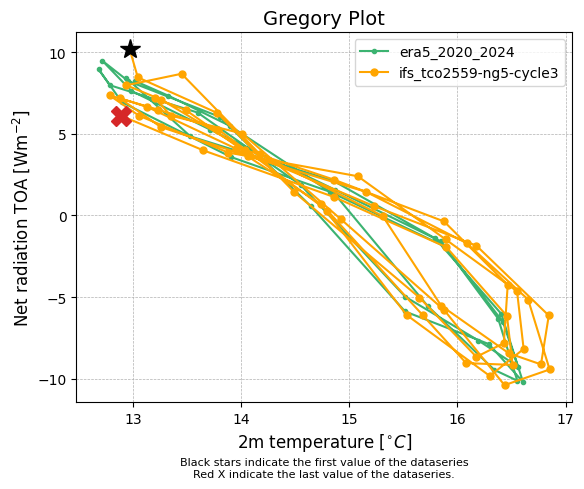

In [7]:
model_list = ifs_4km
gregory_plot(obs_data = era5, models = model_list)